In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\Asus\Documents\Python home practices\Python Dataset\Tourist_Travel_Europe.csv")
df.head()

,Tourist_ID,Country_Visited,City_Visited,Mode_of_Travel,Travel_Duration_Days,Number_of_Companions,Total_Travel_Cost,Accommodation_Type,Main_Purpose,Season_of_Visit
0,1,Germany,Hamburg,Flight,8,4,1060,Hotel,Family Visit,Summer
1,2,Germany,Berlin,Car,16,3,3972,Hostel,Family Visit,Winter
2,3,UK,Manchester,Bicycle,8,2,666,Camping,Business,Winter
3,4,Greece,Thessaloniki,Bicycle,12,3,3644,Hotel,Business,Summer
4,5,Greece,Thessaloniki,Flight,5,3,1885,Airbnb,Leisure,Spring


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Tourist_ID            1000 non-null   int64 
 1   Country_Visited       1000 non-null   object
 2   City_Visited          1000 non-null   object
 3   Mode_of_Travel        1000 non-null   object
 4   Travel_Duration_Days  1000 non-null   int64 
 5   Number_of_Companions  1000 non-null   int64 
 6   Total_Travel_Cost     1000 non-null   int64 
 7   Accommodation_Type    1000 non-null   object
 8   Main_Purpose          1000 non-null   object
 9   Season_of_Visit       1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


In [4]:
df.describe()

,Tourist_ID,Travel_Duration_Days,Number_of_Companions,Total_Travel_Cost
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,10.820000,2.983000,2600.376000
std,288.819436,5.489785,1.428549,1393.394815
min,1.000000,2.000000,1.000000,201.000000
25%,250.750000,6.000000,2.000000,1352.250000
50%,500.500000,11.000000,3.000000,2600.500000
75%,750.250000,16.000000,4.000000,3849.500000
max,1000.000000,20.000000,5.000000,4999.000000


In [5]:
df.describe(include = 'object')

,Country_Visited,City_Visited,Mode_of_Travel,Accommodation_Type,Main_Purpose,Season_of_Visit
count,1000,1000,1000,1000,1000,1000
unique,10,30,5,4,3,4
top,Greece,Lisbon,Flight,Hotel,Family Visit,Winter
freq,112,44,239,259,346,265


In [6]:
df.columns = df.columns.str.strip()

In [7]:
df['Country_Visited'].value_counts()

Country_Visited
Greece         112
Portugal       112
Germany        110
Switzerland    104
Austria        102
France          99
Italy           98
Spain           92
Netherlands     87
UK              84
Name: count, dtype: int64

### Check missing values 

In [8]:
df.isna().sum()

Tourist_ID              0
Country_Visited         0
City_Visited            0
Mode_of_Travel          0
Travel_Duration_Days    0
Number_of_Companions    0
Total_Travel_Cost       0
Accommodation_Type      0
Main_Purpose            0
Season_of_Visit         0
dtype: int64

### Checking Outlier

<Axes: >

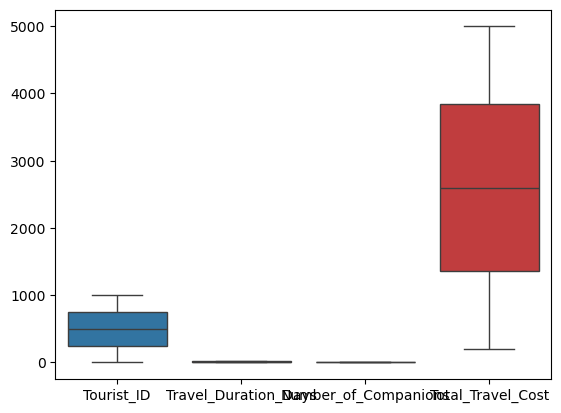

In [9]:
sns.boxplot(data = df)

### Check duplicate values

In [10]:
df.duplicated().sum()

0

* In our dataset there is no duplicated value present

### Distribution of Categorical columns

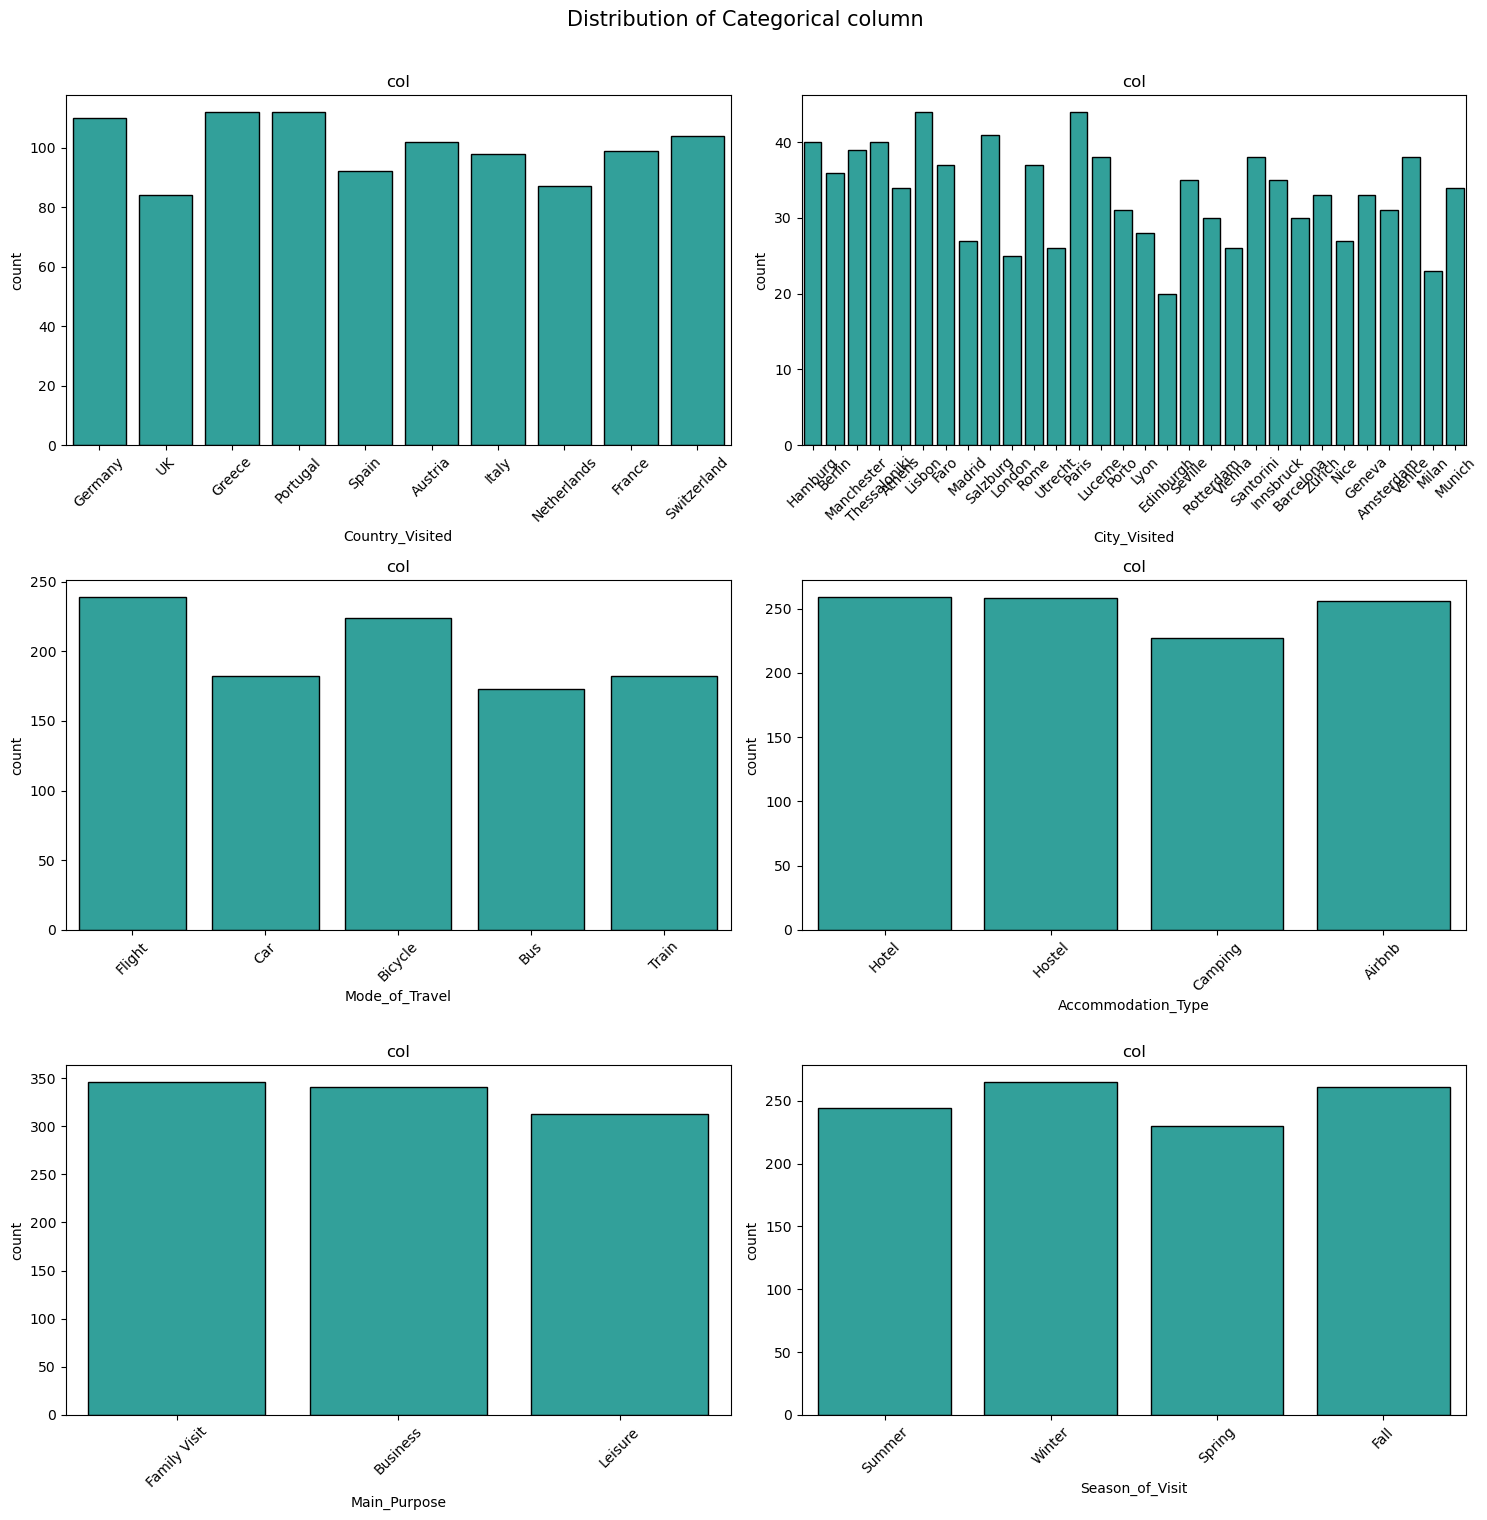

In [11]:
cat_col = df.select_dtypes(include = 'object').columns
l = len(cat_col)

plt.figure(figsize=(15,15))

for i,col in enumerate(cat_col,1):
    plt.subplot(3,2,i)
    sns.countplot(x = df[col], linewidth = 1,edgecolor = 'k',color = '#20B2AA')
    plt.title("col")
    plt.xticks(rotation = 45)

plt.suptitle('Distribution of Categorical column',size = 15,y = 1.01)
plt.tight_layout()
plt.show()



### Distribution of Numeric Columns

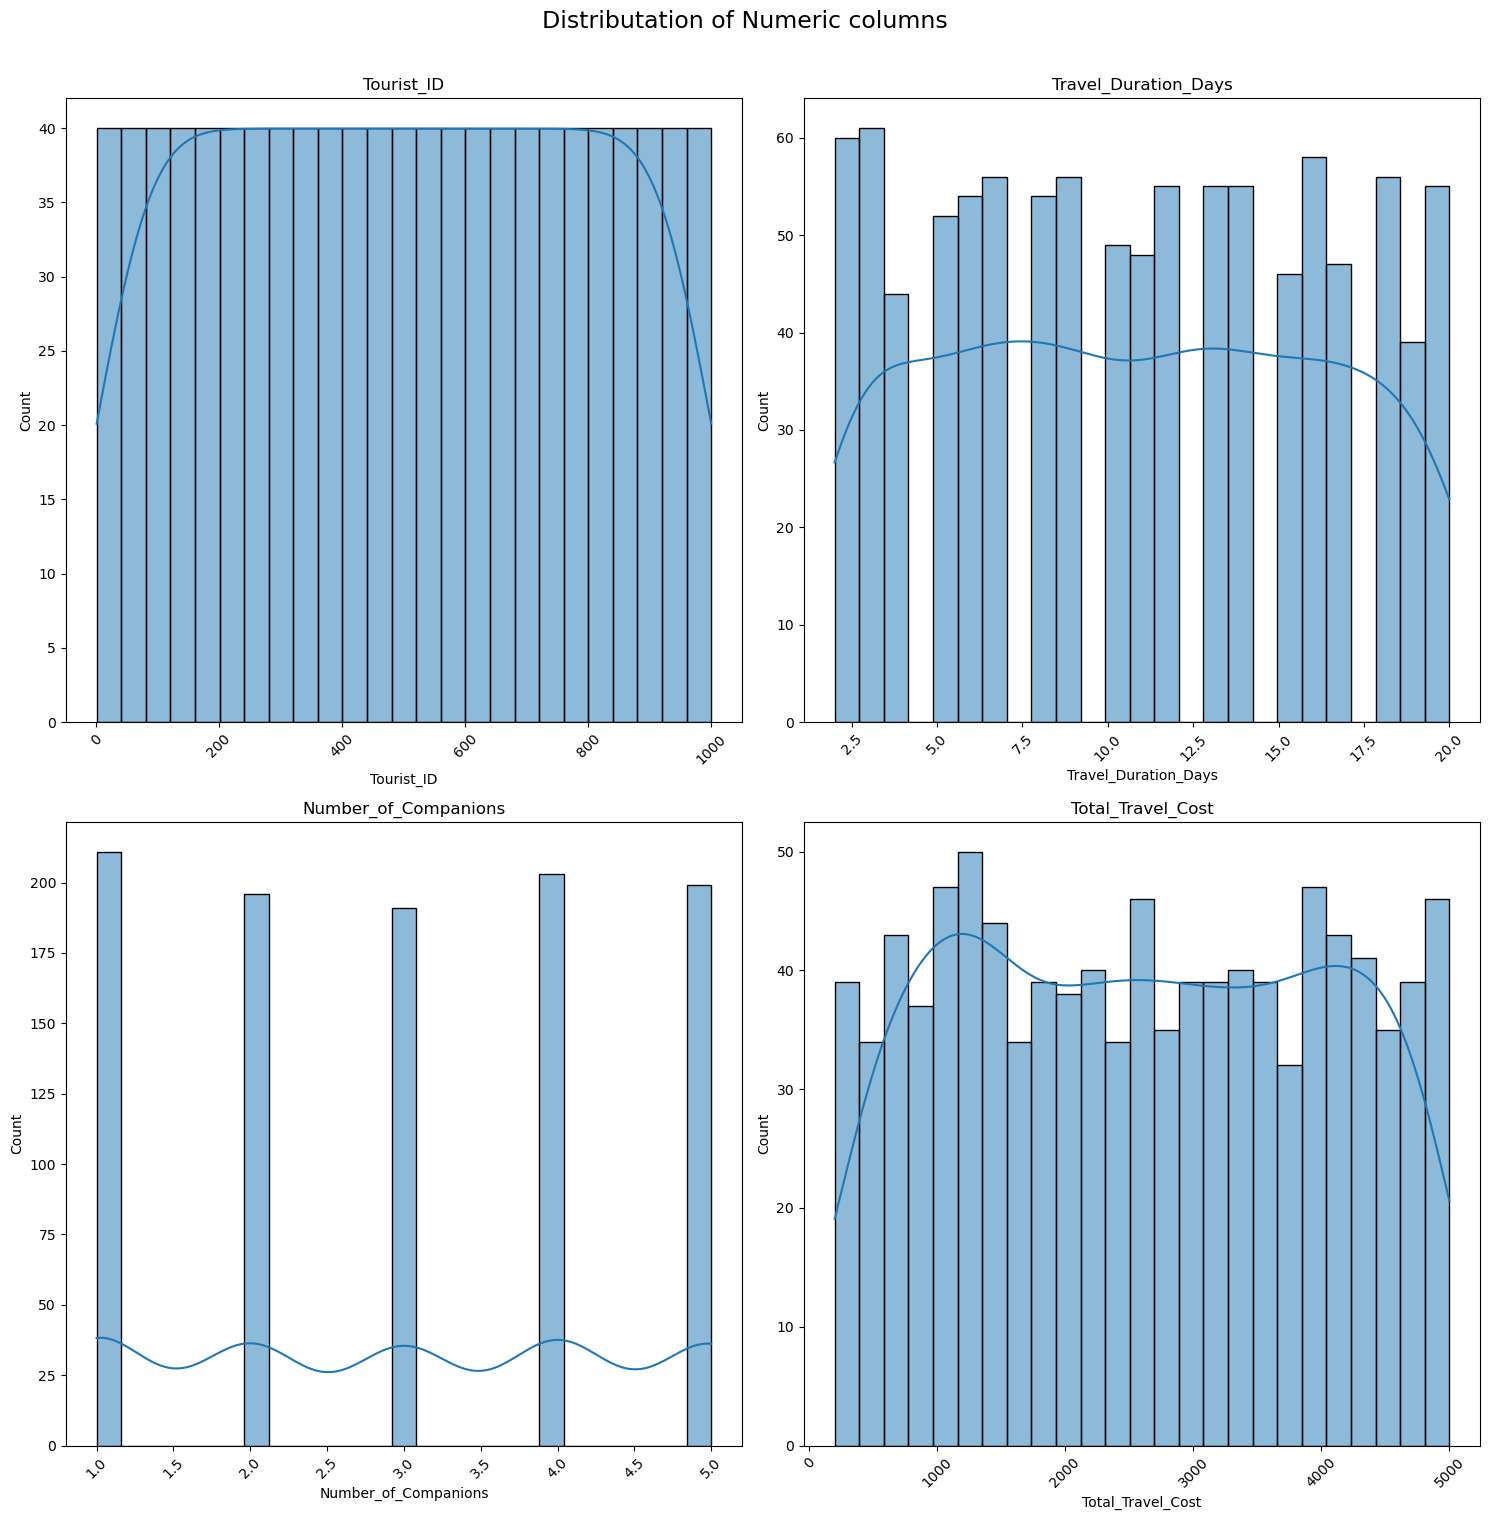

In [12]:
num_col = df.select_dtypes(exclude = 'object').columns
l = len(num_col)
plt.figure(figsize=(15,15))

for i,col in enumerate(num_col,1):
    plt.subplot(2,2,i)
    sns.histplot(x = df[col],linewidth = 1,edgecolor = 'k',bins = 25,kde = True)
    plt.title(col)
    plt.xticks(rotation = 45)

plt.suptitle("Distributation of Numeric columns",size = 17,y = 1.01)
plt.tight_layout()
plt.show()
    

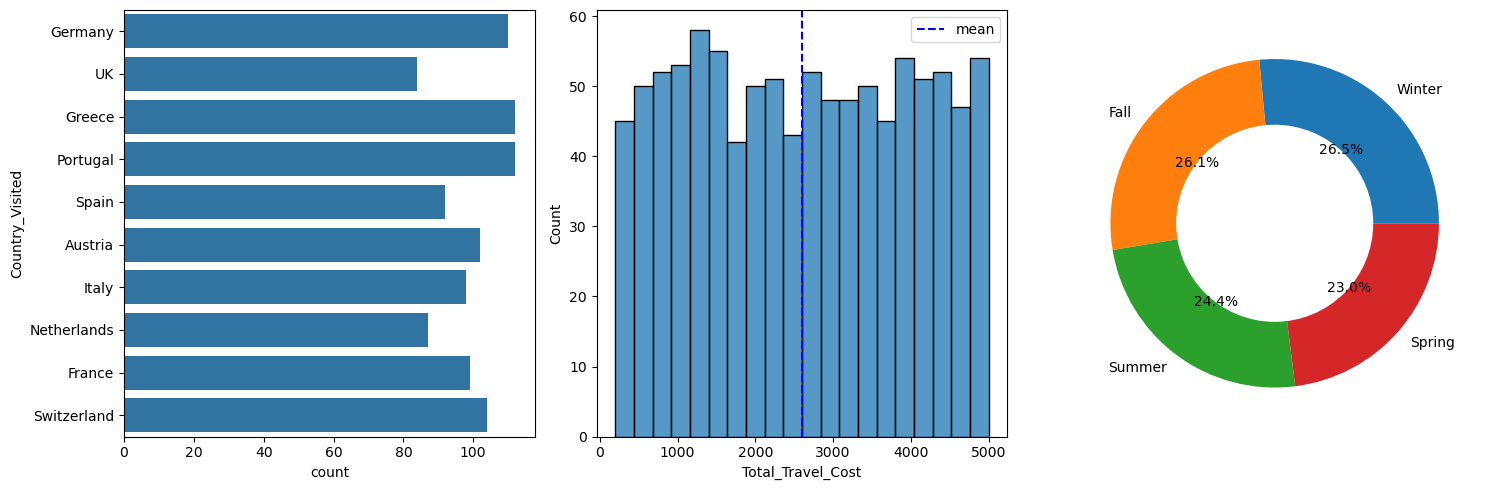

In [13]:
fig , ax = plt.subplots(1,3,figsize = (15,5))
ax[0] = sns.countplot(df['Country_Visited'],ax = ax[0])

ax[1] = sns.histplot(df["Total_Travel_Cost"],bins = 20,ax = ax[1])
ax[1].axvline(df['Total_Travel_Cost'].mean(),color = "blue",linestyle = "--")
ax[1].legend(["mean"])

ax[2] = plt.pie(x = df['Season_of_Visit'].value_counts(),labels = df["Season_of_Visit"].value_counts().keys(),autopct = "%1.1f%%")
radius = 1
cc = plt.Circle((0,0),radius - 0.4,fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(cc)

plt.tight_layout()
plt.show()

In [14]:
ct = df.groupby("Country_Visited")["Total_Travel_Cost"].sum().reset_index()
ct

,Country_Visited,Total_Travel_Cost
0,Austria,259133
1,France,272650
2,Germany,271320
3,Greece,272255
4,Italy,259782
5,Netherlands,232109
6,Portugal,282556
7,Spain,253444
8,Switzerland,268212
9,UK,228915


In [15]:
df['Country_Visited'].value_counts().get('Austria',0)

102

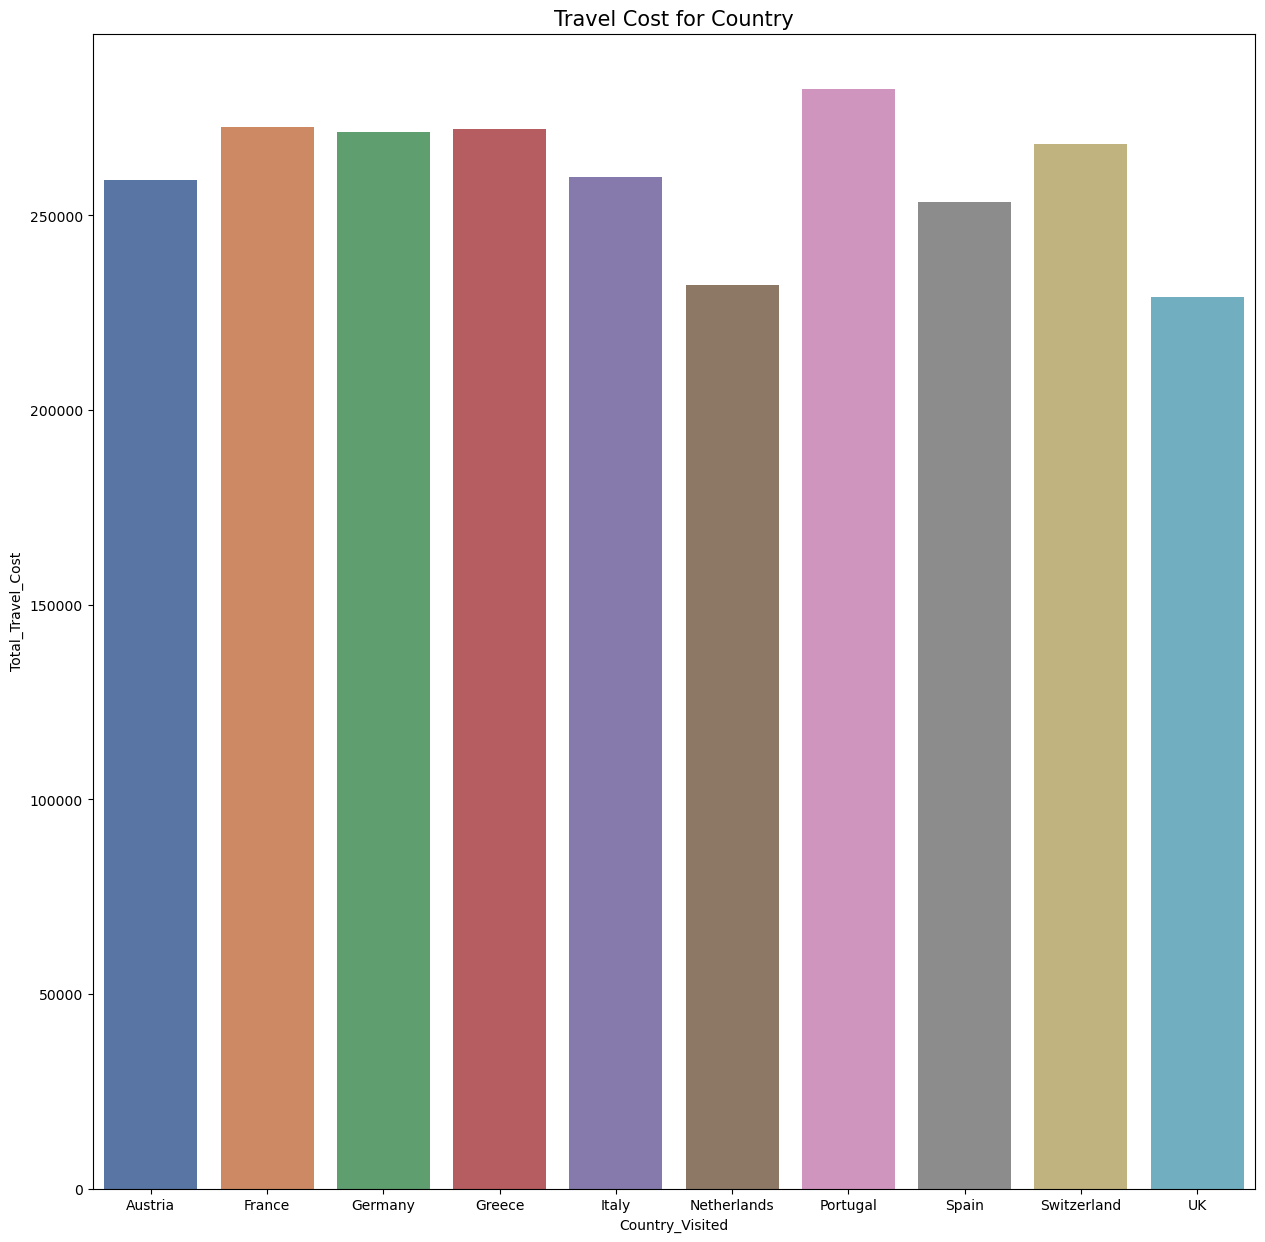

In [16]:
plt.figure(figsize = (15,15))
sns.barplot(ct,x = 'Country_Visited',y = 'Total_Travel_Cost',palette = 'deep')
plt.title('Travel Cost for Country',size = 15)

plt.show()

In [17]:
ms = df.groupby(['Main_Purpose','Season_of_Visit']).size().reset_index(name = 'count')
ms

,Main_Purpose,Season_of_Visit,count
0,Business,Fall,89
1,Business,Spring,76
2,Business,Summer,95
3,Business,Winter,81
4,Family Visit,Fall,86
5,Family Visit,Spring,78
6,Family Visit,Summer,77
7,Family Visit,Winter,105
8,Leisure,Fall,86
9,Leisure,Spring,76


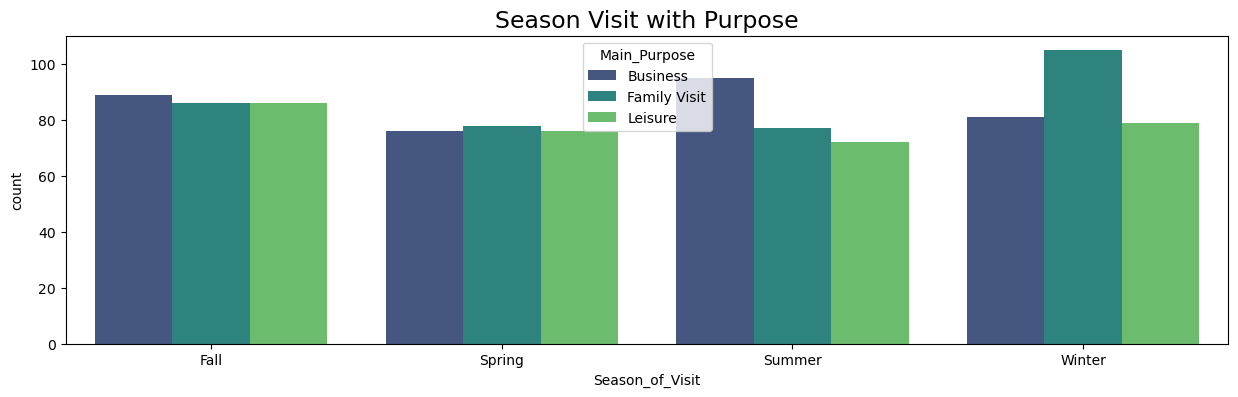

In [18]:
plt.figure(figsize = (15,4))
sns.barplot(ms,x = 'Season_of_Visit',y = 'count',hue = 'Main_Purpose',palette = 'viridis')
plt.title('Season Visit with Purpose',size = 17)
plt.show()

In [19]:
c_td = df.groupby("Country_Visited")["Travel_Duration_Days"].mean().reset_index()
c_td

,Country_Visited,Travel_Duration_Days
0,Austria,11.588235
1,France,10.848485
2,Germany,10.272727
3,Greece,10.437500
4,Italy,10.438776
5,Netherlands,10.908046
6,Portugal,11.410714
7,Spain,11.108696
8,Switzerland,10.317308
9,UK,10.952381


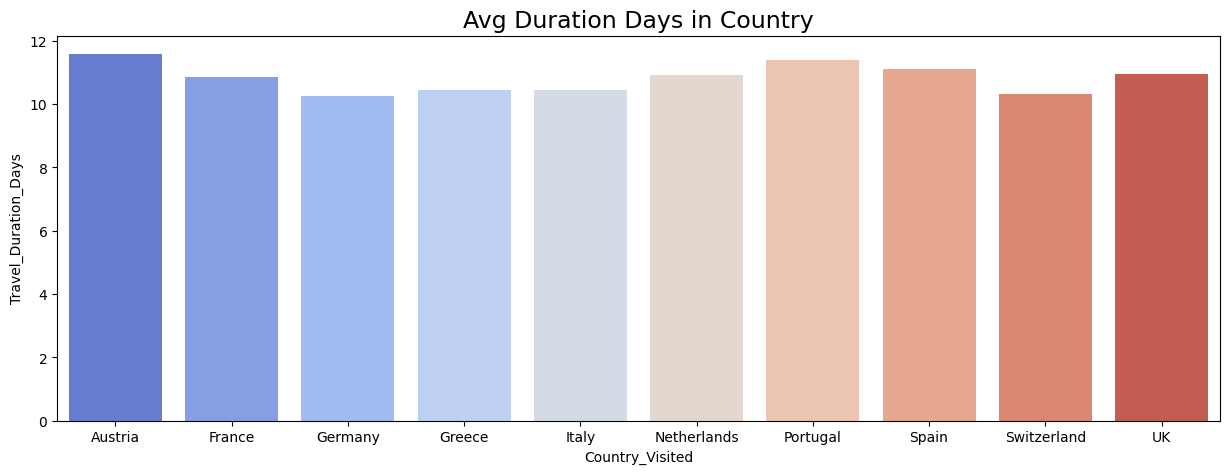

In [20]:
plt.figure(figsize = (15,5))
sns.barplot(c_td,x = 'Country_Visited',y = 'Travel_Duration_Days',palette = 'coolwarm')
plt.title("Avg Duration Days in Country",size = 17)
plt.show()

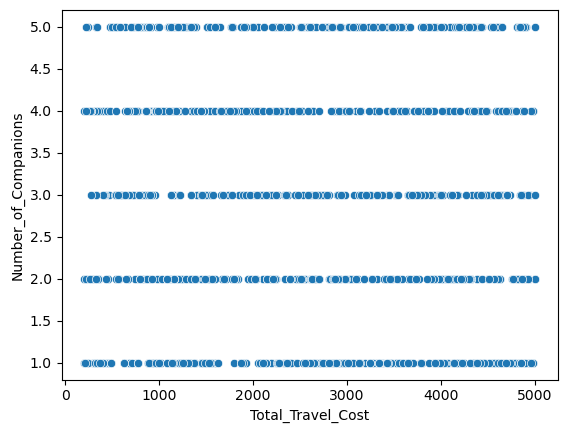

In [21]:
sns.scatterplot(df,y = 'Number_of_Companions',x = 'Total_Travel_Cost')
plt.show()

In [22]:
cv_mt = df.groupby(['Country_Visited','Mode_of_Travel']).size().reset_index(name = 'count')
cv_mt.head()

,Country_Visited,Mode_of_Travel,count
0,Austria,Bicycle,24
1,Austria,Bus,21
2,Austria,Car,15
3,Austria,Flight,22
4,Austria,Train,20


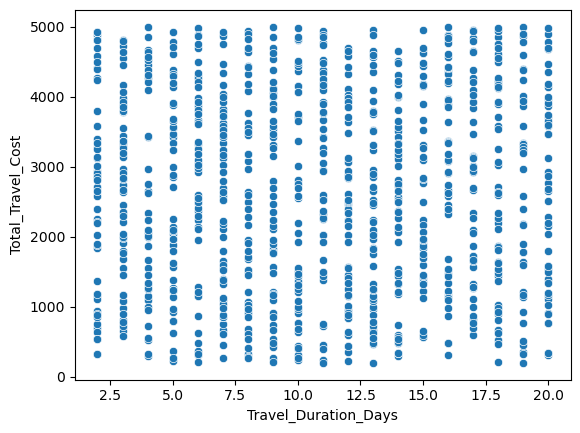

In [23]:
sns.scatterplot(df,x = 'Travel_Duration_Days',y = "Total_Travel_Cost")
plt.show()

In [24]:
df_count = df.groupby(["Country_Visited", "Accommodation_Type"]).size().reset_index(name="Count")
df_count.head()

,Country_Visited,Accommodation_Type,Count
0,Austria,Airbnb,22
1,Austria,Camping,26
2,Austria,Hostel,20
3,Austria,Hotel,34
4,France,Airbnb,20


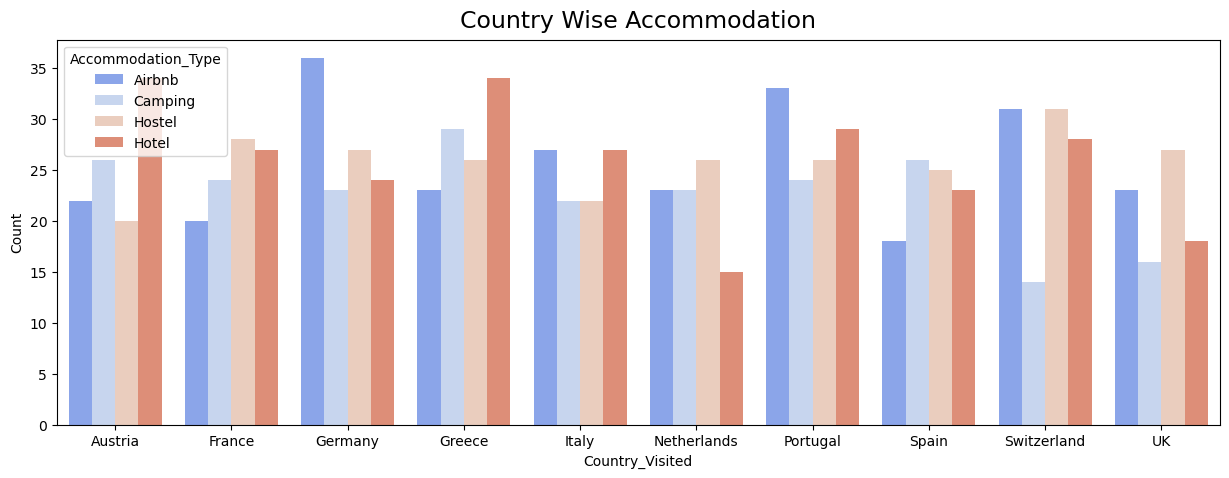

In [25]:
plt.figure(figsize=(15,5))
sns.barplot(data=df_count, x="Country_Visited", y="Count", hue="Accommodation_Type", palette="coolwarm")

plt.title("Country Wise Accommodation", size=17, y=1.01)
plt.show()


In [26]:
ct.head()

,Country_Visited,Total_Travel_Cost
0,Austria,259133
1,France,272650
2,Germany,271320
3,Greece,272255
4,Italy,259782


In [27]:
cv_td = df.groupby(['Country_Visited'])['Travel_Duration_Days'].mean().reset_index()
cv_td.head()

,Country_Visited,Travel_Duration_Days
0,Austria,11.588235
1,France,10.848485
2,Germany,10.272727
3,Greece,10.437500
4,Italy,10.438776


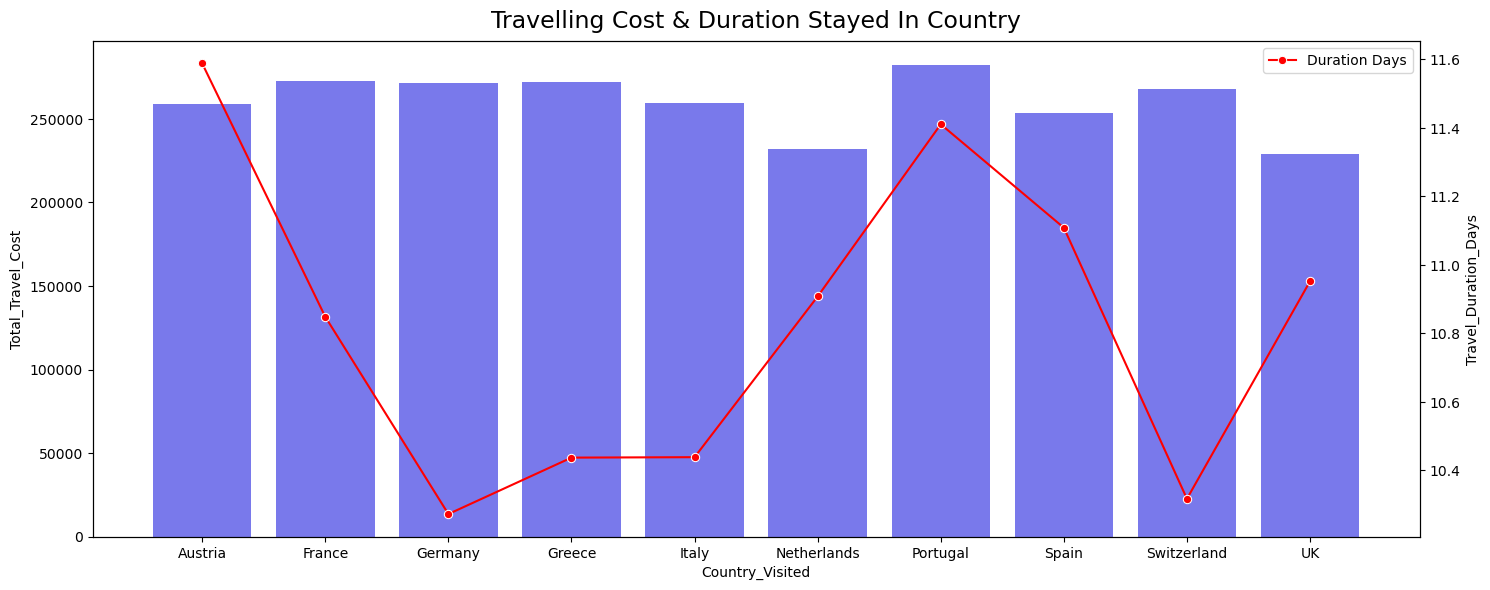

In [28]:
fig,ax1 = plt.subplots(figsize = (15,6))
ax1 = sns.barplot(ct,x="Country_Visited",y = 'Total_Travel_Cost',color = 'blue',alpha = 0.6)
ax2 = ax1.twinx()
ax2 = sns.lineplot(cv_td,x = "Country_Visited",y = "Travel_Duration_Days",marker = 'o',color = 'Red')
ax2.legend(["Duration Days"])

plt.title("Travelling Cost & Duration Stayed In Country",size =17 ,y = 1.01)
plt.tight_layout()
plt.show()

In [29]:
aus = df[df['Country_Visited'].str.contains('Aus')]
aus

,Tourist_ID,Country_Visited,City_Visited,Mode_of_Travel,Travel_Duration_Days,Number_of_Companions,Total_Travel_Cost,Accommodation_Type,Main_Purpose,Season_of_Visit
13,14,Austria,Salzburg,Bus,15,2,2241,Camping,Business,Summer
35,36,Austria,Vienna,Flight,9,3,1770,Hostel,Leisure,Summer
37,38,Austria,Innsbruck,Car,2,5,702,Airbnb,Business,Summer
38,39,Austria,Innsbruck,Bicycle,15,3,4688,Hotel,Family Visit,Winter
43,44,Austria,Salzburg,Bicycle,14,3,3514,Airbnb,Leisure,Winter
...,...,...,...,...,...,...,...,...,...,...
974,975,Austria,Salzburg,Train,20,3,1577,Hostel,Family Visit,Fall
991,992,Austria,Innsbruck,Bus,13,4,4877,Camping,Family Visit,Winter
993,994,Austria,Salzburg,Bicycle,16,3,4999,Hotel,Business,Fall
997,998,Austria,Vienna,Car,16,4,1102,Hotel,Leisure,Fall


In [30]:
x = aus[["Accommodation_Type","Main_Purpose","Season_of_Visit","Total_Travel_Cost"]]


In [31]:
x.head()

,Accommodation_Type,Main_Purpose,Season_of_Visit,Total_Travel_Cost
13,Camping,Business,Summer,2241
35,Hostel,Leisure,Summer,1770
37,Airbnb,Business,Summer,702
38,Hotel,Family Visit,Winter,4688
43,Airbnb,Leisure,Winter,3514


In [32]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()

# x = x.apply(lambda col:le.fit_transform(col) if col.dtype == "Object" else col)
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Ensure all object-type columns are encoded properly
for col in x.select_dtypes(include=['object']).columns:
    x[col] = le.fit_transform(x[col])


In [33]:
x.head(3)

,Accommodation_Type,Main_Purpose,Season_of_Visit,Total_Travel_Cost
13,1,0,2,2241
35,2,2,2,1770
37,0,0,2,702


In [34]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import warnings as w
w.filterwarnings("ignore")

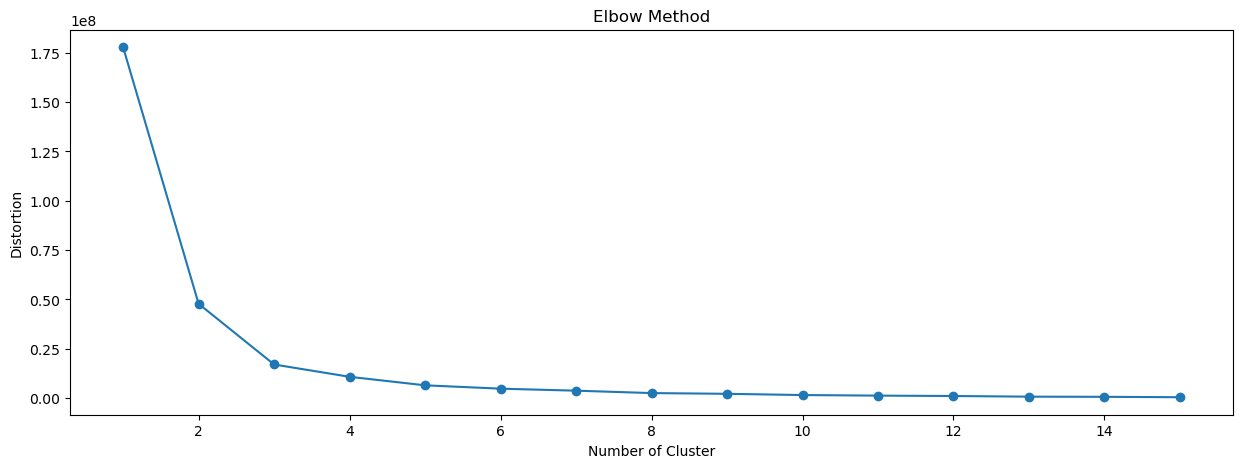

In [35]:
from sklearn.cluster import KMeans

plt.figure(figsize = (15,5))

#Elbow Method
distortions = []
for k in range(1,16):
    kmeans = KMeans(n_clusters = k,random_state = 42)
    kmeans.fit(x)
    distortions.append(kmeans.inertia_)

plt.plot(range(1,16),distortions,marker= 'o')
plt.xlabel("Number of Cluster")
plt.ylabel("Distortion")
plt.title("Elbow Method")
plt.show()

In [40]:
kmeans = KMeans(n_clusters=3, random_state=42)
x['Cluster'] = kmeans.fit_predict(x)


In [41]:
x["Cluster"].value_counts()


Cluster
0    36
2    34
1    32
Name: count, dtype: int64

<Axes: >

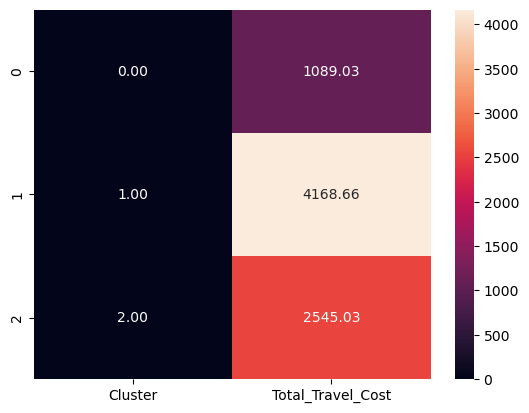

In [42]:
sns.heatmap( x.groupby("Cluster")["Total_Travel_Cost"].mean().reset_index() , annot = True , fmt = "1.2f")
